<a href="https://colab.research.google.com/github/namruthabhasi/mulearn_ai/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [8]:
a_coeff = 1
b_coeff = -6
c_coeff = 11
d_coeff = -6

x_initial_guess = torch.tensor(0.0, requires_grad=True)

In [9]:
def cubic_function(x, a, b, c, d):
    # ReLU is not applied here as it's not conventional for direct root finding
    return a * x**3 + b * x**2 + c * x + d


In [10]:
loss_fn = nn.MSELoss()
learning_rate = 0.01
optimizer = optim.SGD([x_initial_guess], lr=learning_rate)
num_iterations = 10000

loss_history = []
x_history = []

for i in range(num_iterations):
    optimizer.zero_grad()
    output = cubic_function(x_initial_guess, a_coeff, b_coeff, c_coeff, d_coeff)
    loss = loss_fn(output, torch.tensor(0.0))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    x_history.append(x_initial_guess.item())

print(f"Final estimated root x: {x_initial_guess.item():.6f}")
final_fx_value = cubic_function(x_initial_guess, a_coeff, b_coeff, c_coeff, d_coeff).item()
print(f"Final function value at this x: {final_fx_value:.6f}")

Final estimated root x: 1.000001
Final function value at this x: 0.000001


In [11]:
coefficients = [a_coeff, b_coeff, c_coeff, d_coeff]
numpy_roots = np.roots(coefficients)
print(f"Roots calculated by NumPy: {numpy_roots}")


Roots calculated by NumPy: [3. 2. 1.]


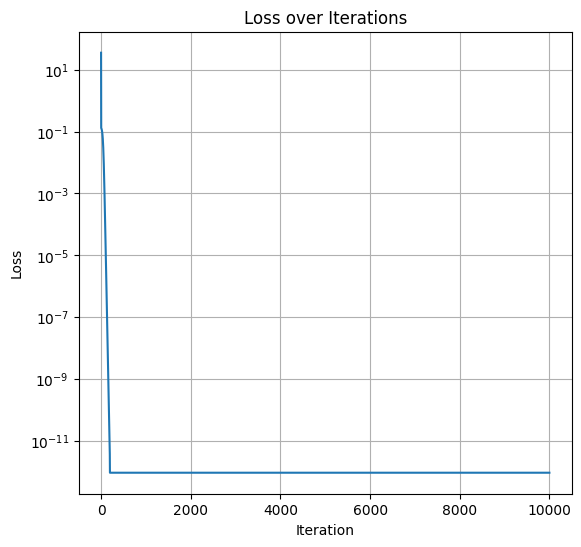

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid(True)



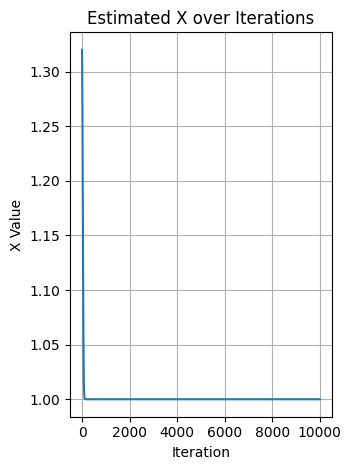

In [13]:
plt.subplot(1, 2, 2)
plt.plot(x_history)
plt.title('Estimated X over Iterations')
plt.xlabel('Iteration')
plt.ylabel('X Value')
plt.grid(True)

plt.tight_layout()
plt.show()


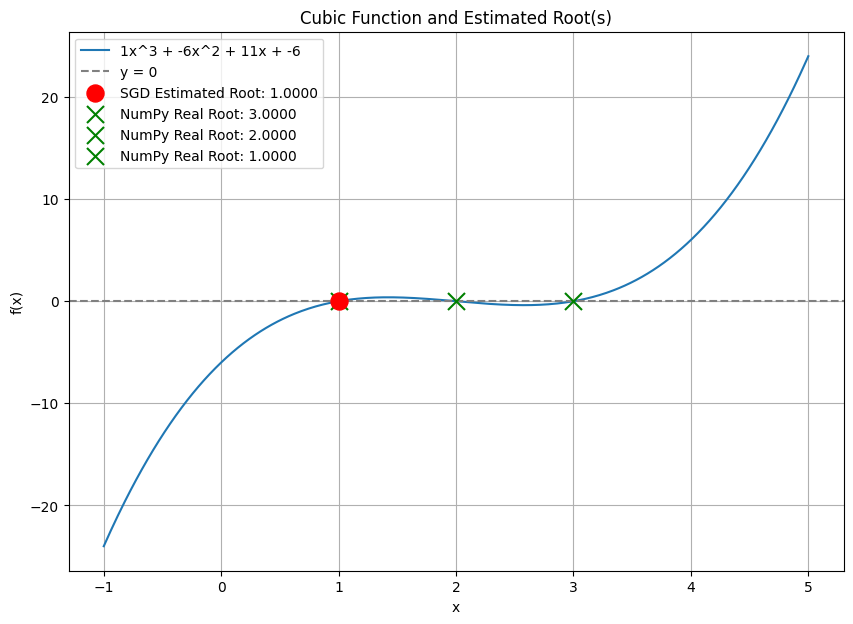

In [14]:
x_plot_values = np.linspace(min(x_history) - 2, max(x_history) + 2, 500)
if len(numpy_roots) > 0:
    all_real_roots = [root.real for root in numpy_roots if np.isreal(root)]
    if len(all_real_roots) > 0:
        min_root_val = min(all_real_roots)
        max_root_val = max(all_real_roots)
        x_plot_values = np.linspace(min(min_root_val, min(x_history)) - 2,
                                    max(max_root_val, max(x_history)) + 2, 500)

y_plot_values = a_coeff * x_plot_values**3 + b_coeff * x_plot_values**2 + c_coeff * x_plot_values + d_coeff

plt.figure(figsize=(10, 7))
plt.plot(x_plot_values, y_plot_values, label=f'{a_coeff}x^3 + {b_coeff}x^2 + {c_coeff}x + {d_coeff}')
plt.axhline(0, color='grey', linestyle='--', label='y = 0')

plt.scatter([x_initial_guess.item()], [final_fx_value], color='red', marker='o', s=150,
            label=f'SGD Estimated Root: {x_initial_guess.item():.4f}', zorder=5)

for root in numpy_roots:
    if np.isreal(root):
        plt.scatter(root.real, 0, color='green', marker='x', s=150,
                    label=f'NumPy Real Root: {root.real:.4f}', zorder=4)

plt.title('Cubic Function and Estimated Root(s)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.ylim(min(y_plot_values) * 1.1, max(y_plot_values) * 1.1)
plt.show()
